In [1]:
import hydroengine as he

import json
from shapely.geometry import mapping, shape

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

sns.set(color_codes=True)

### Query lake information for a given catchment determined by a region (searches upstream area)

Alternatively all lakes can be downloaded using hydroengine command-line tool or download_lakes(region, path, id_only) function

In [2]:
# Limpopo downstream
geometry = { "type": "Point", "coordinates": [33.56529235839844, -24.895779429137615] }
lakes = he.get_lakes(geometry)

In [3]:
len(lakes['features'])

757

In [4]:
lakes['features'][0]

{'geometry': {'coordinates': [[[29.234220174793556, -19.86715432823487],
    [29.234107821684788, -19.86640424660197],
    [29.234983677103635, -19.86572599034646],
    [29.234354874265467, -19.864068609827527],
    [29.234467138511878, -19.86333197407517],
    [29.234220174793556, -19.861665586210588],
    [29.234485139801027, -19.85987796948916],
    [29.234085386523493, -19.858907766769335],
    [29.233241006182023, -19.86027765281979],
    [29.233101783171552, -19.862397707545544],
    [29.232553757575314, -19.863107349197808],
    [29.231129945745817, -19.8642078128075],
    [29.23174980570441, -19.86625597246903],
    [29.231610492624696, -19.86718577863214],
    [29.234027037353027, -19.867639422578307],
    [29.234220174793556, -19.86715432823487]]],
  'geodesic': True,
  'type': 'Polygon'},
 'id': '0000f105acb5489e4fa6',
 'properties': {'Continent': 'Africa',
  'Country': 'Zimbabwe',
  'Depth_avg': 3.2,
  'Dis_avg': 0.114,
  'Elevation': 1337,
  'Grand_id': 0,
  'Hylak_id': 14

### Download surface water area time series for a single lake

In [5]:
lake_id = 183160

In [6]:
ts = he.get_lake_time_series(lake_id, 'water_area')

In [7]:
d = pd.DataFrame(ts)

In [9]:
d['time'] = pd.to_datetime(d['time'], unit='ms')

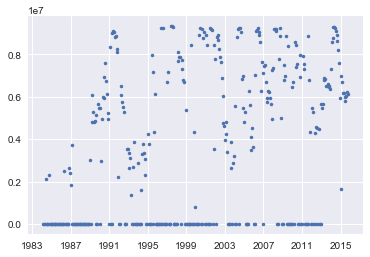

In [10]:
plt.plot(d.time, d.water_area, '.')

In [11]:
# remove empty values, the algorithm should be actually smarter, distinguishing between NODATA and NOT WATER
d = d[d.water_area > 0]

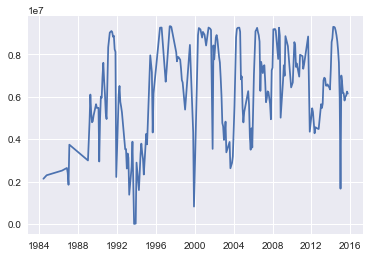

In [12]:
plt.plot(d.time, d.water_area, '-')

In [13]:
lake = he.get_lake_by_id(lake_id)

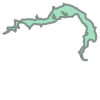

In [14]:
s = shape(lake['geometry'])
s


In [15]:
lake['properties']

{'Continent': 'Africa',
 'Country': 'South Africa',
 'Depth_avg': 6.0,
 'Dis_avg': 2.023,
 'Elevation': 985,
 'Grand_id': 4145,
 'Hylak_id': 183160,
 'Lake_area': 9.66,
 'Lake_name': '',
 'Lake_type': 2,
 'Poly_src': 'SWBD',
 'Pour_lat': -25.310428,
 'Pour_long': 27.472905,
 'Res_time': 333.5,
 'Shore_dev': 3.56,
 'Shore_len': 39.24,
 'Slope_100': 1.64,
 'Vol_res': 58.3,
 'Vol_src': 2,
 'Vol_total': 58.3,
 'Wshd_area': 4548.0}